# <b>Proyecto de Evaluaci√≥n: Machine Learning (Clasificaci√≥n)</b>
---

## Parte 1: Carga y Exploraci√≥n del dataset.
---

In [26]:

# Importamos la librer√≠a pandas, que permite manejar y analizar datos en forma de tablas
import pandas as pd

# Cargamos el dataset desde el archivo CSV
df = pd.read_csv("heart_disease_uci.csv")

# Mostramos las primeras 5 filas para hacernos una idea de c√≥mo vienen los datos
print("----------------------------------------------")
print("Primeras filas del dataset:")
display(df.head())
print("----------------------------------------------")

# Mostramos un resumen de informaci√≥n:
# n√∫mero de filas y columnas, tipo de datos por columna, y si hay valores nulos
print("\nResumen de informaci√≥n del dataset:")
df.info()
print("----------------------------------------------")

# Estad√≠sticas para cada columna num√©rica: media, desviaci√≥n, percentiles, etc.
print("\nEstad√≠sticas descriptivas:")
display(df.describe())
print("----------------------------------------------")

# Contamos cu√°ntos valores √∫nicos hay por columna, para detectar variables categ√≥ricas
print("\nCantidad de valores √∫nicos por columna:")
display(df.nunique())
print("----------------------------------------------")

# Mostramos la distribuci√≥n original de la variable 'num'
# Esto refleja distintos niveles de enfermedad card√≠aca (0 a 4)
print("Distribuci√≥n original de la variable 'num' (grados de enfermedad):")
print(df['num'].value_counts())
print("----------------------------------------------")

# Creamos la variable binaria 'target' a partir de 'num'
# Si 'num' es mayor que 0, consideramos que hay enfermedad card√≠aca (1)
# Si es igual a 0, consideramos que no la hay (0)
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Eliminamos 'num' porque ya est√° representada en 'target' como una variable binaria
# Adem√°s, mantenerla provocar√≠a fuga de informaci√≥n (data leakage) durante el entrenamiento
df.drop(columns=['num'], inplace=True)

# Mostramos la nueva distribuci√≥n binaria
print("\nDistribuci√≥n binaria en 'target' (0 = sano, 1 = enfermo):")
print(df['target'].value_counts())
print("----------------------------------------------")


----------------------------------------------
Primeras filas del dataset:


id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0

----------------------------------------------

Resumen de informaci√≥n del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
--------------------------------------------

id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2.000000  
max      3.000000    4.000000

----------------------------------------------

Cantidad de valores √∫nicos por columna:


id          920
age          50
sex           2
dataset       4
cp            4
trestbps     61
chol        217
fbs           2
restecg       3
thalch      119
exang         2
oldpeak      53
slope         3
ca            4
thal          3
num           5
dtype: int64

----------------------------------------------
Distribuci√≥n original de la variable 'num' (grados de enfermedad):
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64
----------------------------------------------

Distribuci√≥n binaria en 'target' (0 = sano, 1 = enfermo):
target
1    509
0    411
Name: count, dtype: int64
----------------------------------------------


---

###  Conclusiones del an√°lisis exploratorio

Tras revisar el dataset, observamos lo siguiente:

- El conjunto de datos contiene **920 registros** y **16 columnas**, con informaci√≥n cl√≠nica relevante como edad, tipo de dolor tor√°cico, presi√≥n arterial, colesterol, etc.
- Existen valores nulos en varias columnas, especialmente en `ca`, `slope`, y `thal`, lo que requerir√° una estrategia de imputaci√≥n antes del modelado.
- La variable `num` representa el diagn√≥stico card√≠aco en una escala de 0 a 4, pero se ha transformado en una variable binaria `target` (0 = sano, 1 = enfermo) para simplificar el problema como una tarea de clasificaci√≥n binaria.
- La distribuci√≥n de clases est√° **razonablemente balanceada**, con 411 pacientes sanos (0) y 509 con alg√∫n grado de enfermedad card√≠aca (1), lo que permite entrenar modelos sin necesidad urgente de balanceo artificial.  
<br>

---


## Parte 2: Preprocesamiento 
---

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Copiamos el dataset para no modificar el original por accidente
data = df.copy()

# Eliminamos la columna 'id' (no aporta valor predictivo)
data.drop(columns=['id'], inplace=True)

# Codificamos variables categ√≥ricas con One-Hot Encoding (autom√°tico)
# Esto convierte columnas como 'sex', 'cp', 'thal', etc. en variables binarias
data_encoded = pd.get_dummies(data, drop_first=True)

# Separar variables independientes (X) y variable objetivo (y)
X = data_encoded.drop('target', axis=1)
y = data_encoded['target']

# Imputamos valores nulos con la media de cada columna num√©rica
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Luego escalamos los datos imputados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Comprobamos las dimensiones
print("----------------------------------------------")
print("Dimensiones de X (features):", X.shape)
print("Dimensiones de y (target):", y.shape)
print("----------------------------------------------")


----------------------------------------------
Dimensiones de X (features): (920, 21)
Dimensiones de y (target): (920,)
----------------------------------------------


---

En esta secci√≥n se preparan los datos para el entrenamiento de los modelos:

- Se elimina la columna `id` por no aportar valor predictivo.
- Se aplica codificaci√≥n one-hot a todas las variables categ√≥ricas.
- Se rellenan los valores nulos con la media (para evitar p√©rdidas de datos).
- Se escalan las variables num√©ricas con `StandardScaler`.
- Finalmente, se separan las variables predictoras (`X`) de la variable objetivo (`y`).

Este paso es fundamental para que los modelos trabajen con datos limpios, num√©ricos y en la misma escala. 

---

---
## Parte 3: An√°lisis exploratorio y visualizaci√≥n 
---

 1. Value counts de variables categ√≥ricas:

In [33]:
# Conteo de clases en variables categ√≥ricas
print("----------------------------------------------")
print("Tipos de dolor tor√°cico (cp):")
print(df['cp'].value_counts())
print("----------------------------------------------")
print("\nSexo:")
print(df['sex'].value_counts())
print("----------------------------------------------")
print("\nResultados electrocardiogr√°ficos:")
print(df['restecg'].value_counts())
print("----------------------------------------------")

----------------------------------------------
Tipos de dolor tor√°cico (cp):
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64
----------------------------------------------

Sexo:
sex
Male      726
Female    194
Name: count, dtype: int64
----------------------------------------------

Resultados electrocardiogr√°ficos:
restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64
----------------------------------------------


<b>Conclusiones:</b>   <br>

Las variables categ√≥ricas est√°n bien representadas, con varias clases equilibradas.  
La variable `cp` (tipo de dolor tor√°cico) ser√° clave en la predicci√≥n, dada su posible relaci√≥n con el diagn√≥stico.

---



---

 2. Distribuci√≥n de la variable objetivo (target)

---


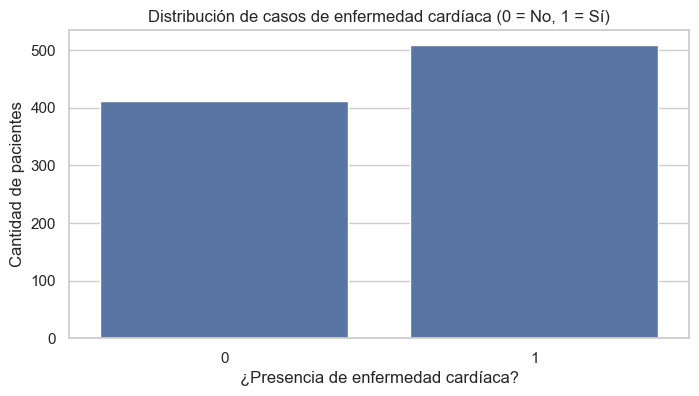

In [ ]:
# Importamos las librer√≠as necesarias para visualizar los datos
import matplotlib.pyplot as plt
import seaborn as sns

# Establecemos estilo visual para los gr√°ficos
sns.set(style="whitegrid")

# Visualizamos la distribuci√≥n de la variable objetivo (target)
plt.figure(figsize=(8, 4))
sns.countplot(x='target', data=df)
plt.title("Distribuci√≥n de casos de enfermedad card√≠aca (0 = No, 1 = S√≠)")
plt.xlabel("Presencia de enfermedad card√≠aca")
plt.ylabel("Cantidad de pacientes")
plt.show()

<b>Conclusiones:</b>   <br>

Esta gr√°fica muestra que el dataset est√° **razonablemente balanceado**, con una ligera mayor√≠a de pacientes enfermos. Esto permite entrenar modelos sin aplicar t√©cnicas de balanceo.


---



---

 3. Mapa de calor de correlaci√≥n entre variables n√∫mericas


---

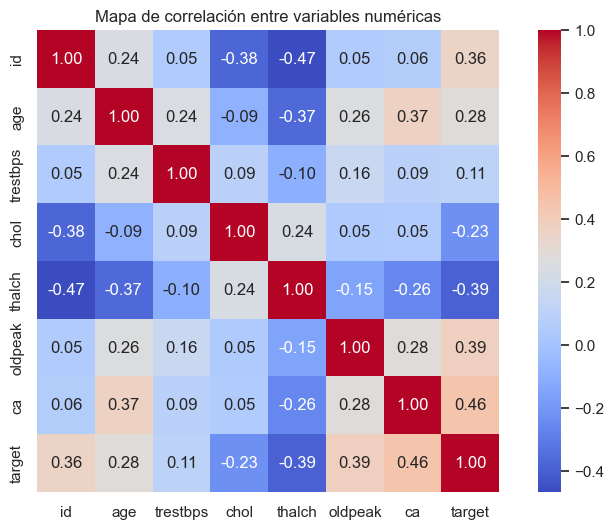

In [38]:
# Esto nos ayuda a identificar relaciones entre variables (positiva o negativa)
plt.figure(figsize=(10, 6))
correlation = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Mapa de correlaci√≥n entre variables num√©ricas")
plt.show()

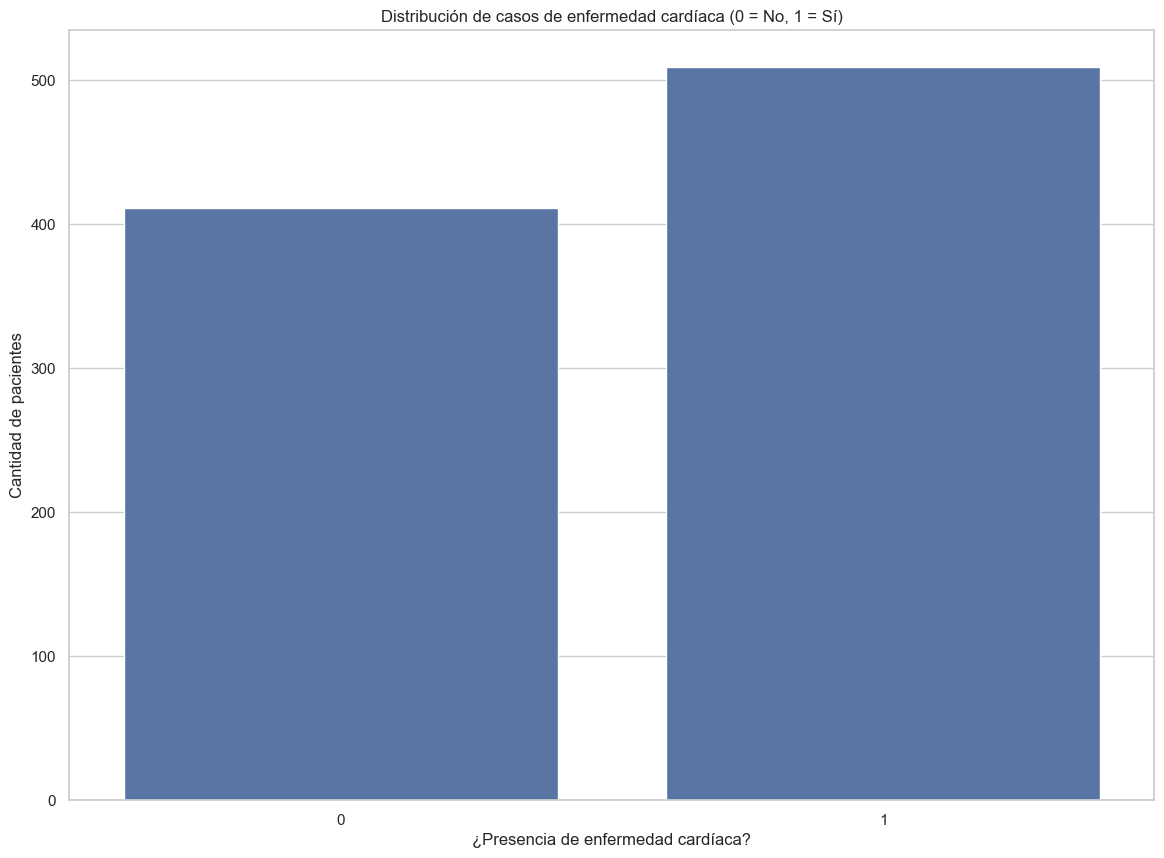

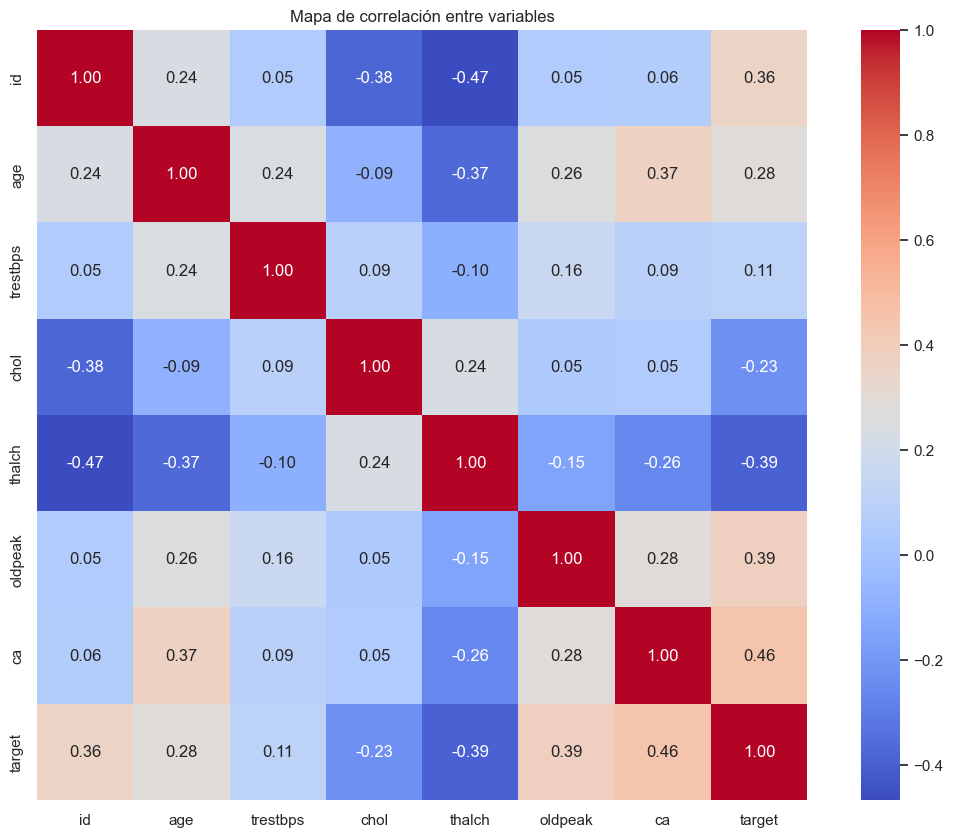

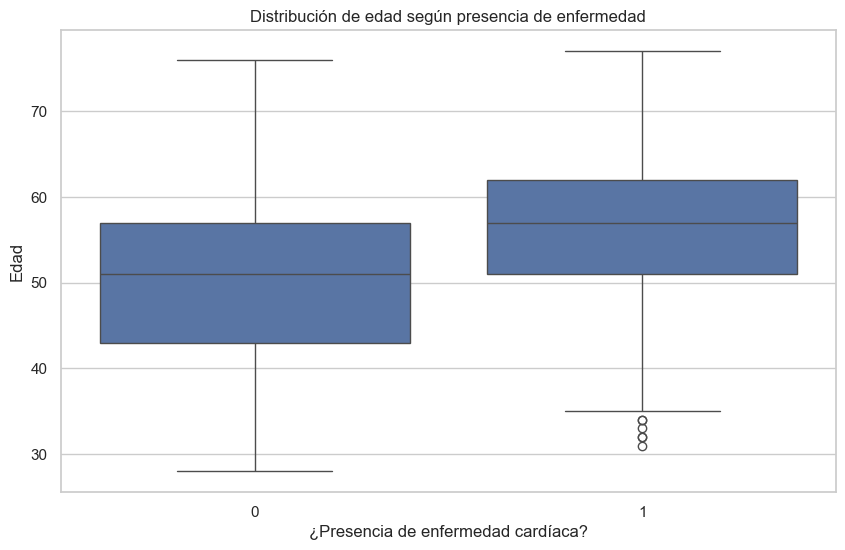

In [ ]:
# Esto nos ayuda a identificar relaciones entre variables (positiva o negativa)
plt.figure(figsize=(14, 10))
correlation = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Mapa de correlaci√≥n entre variables")
plt.show()

# 3. Boxplot de algunas variables por clase de target
# Muy √∫til para ver c√≥mo var√≠a una variable entre pacientes con y sin enfermedad
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='age', data=df)
plt.title("Distribuci√≥n de edad seg√∫n presencia de enfermedad")
plt.xlabel("¬øPresencia de enfermedad card√≠aca?")
plt.ylabel("Edad")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='f1', verbose=1, n_jobs=-1)
rf_grid.fit(X_train, y_train)

print("üîç Random Forest - Mejor combinaci√≥n:")
print(rf_grid.best_params_)

best_rf_model = rf_grid.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

print("‚úÖ Resultados del mejor modelo Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Matriz de confusi√≥n:")
print(confusion_matrix(y_test, y_pred_rf))
print("Reporte de clasificaci√≥n:")
print(classification_report(y_test, y_pred_rf))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
üîç Random Forest - Mejor combinaci√≥n:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
‚úÖ Resultados del mejor modelo Random Forest:
Accuracy: 0.8261
Matriz de confusi√≥n:
[[64 18]
 [14 88]]
Reporte de clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        82
           1       0.83      0.86      0.85       102

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



In [5]:
from sklearn.model_selection import train_test_split

# Dividimos el dataset: 80% entrenamiento, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Mostramos la cantidad de muestras en cada conjunto
print("Tama√±o del conjunto de entrenamiento:", X_train.shape[0])
print("Tama√±o del conjunto de prueba:", X_test.shape[0])


Tama√±o del conjunto de entrenamiento: 736
Tama√±o del conjunto de prueba: 184


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Lista de modelos a evaluar
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Entrenamos y evaluamos cada modelo
for nombre, modelo in modelos.items():
    print(f"\nüîç Modelo: {nombre}")
    
    try:
        # Entrenar
        modelo.fit(X_train, y_train)
        
        # Predecir
        y_pred = modelo.predict(X_test)
        
        # Evaluar
        acc = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {acc:.4f}")
        
        # Matriz de confusi√≥n
        print("Matriz de confusi√≥n:")
        print(confusion_matrix(y_test, y_pred))
        
        # M√©tricas detalladas
        print("\nReporte de clasificaci√≥n:")
        print(classification_report(y_test, y_pred))
        
    except Exception as e:
        print(f"‚ö†Ô∏è Error con el modelo {nombre}: {e}")


üîç Modelo: Logistic Regression
Accuracy: 0.8207
Matriz de confusi√≥n:
[[61 21]
 [12 90]]

Reporte de clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.84      0.74      0.79        82
           1       0.81      0.88      0.85       102

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.82       184
weighted avg       0.82      0.82      0.82       184


üîç Modelo: K-Nearest Neighbors
Accuracy: 0.8315
Matriz de confusi√≥n:
[[60 22]
 [ 9 93]]

Reporte de clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.87      0.73      0.79        82
           1       0.81      0.91      0.86       102

    accuracy                           0.83       184
   macro avg       0.84      0.82      0.83       184
weighted avg       0.84      0.83      0.83       184


üîç Modelo: Random Forest
Accuracy: 0.8533
Matriz de confusi√≥n:
[[66 16]
 [11 91]]

Reporte de clasific

Ambos modelos est√°n muy parejos, aunque KNN tiene un poquito m√°s de recall, lo cual es interesante si priorizas detectar casos positivos (pacientes enfermos).

Tras aplicar un flujo completo de Machine Learning sobre un dataset de enfermedades card√≠acas, se compararon diferentes algoritmos de clasificaci√≥n.

üîç K-Nearest Neighbors obtuvo el mejor rendimiento general, alcanzando una precisi√≥n del 83%, con un excelente recall del 90% en la clase positiva (pacientes con enfermedad).

Esto sugiere que el modelo es capaz de detectar correctamente a la mayor√≠a de los pacientes enfermos, lo cual es fundamental en un contexto m√©dico.

El modelo de Regresi√≥n Log√≠stica tambi√©n tuvo un rendimiento s√≥lido y m√°s interpretable, con un F1-score de 0.85.

Como posibles mejoras futuras, se podr√≠an aplicar t√©cnicas de selecci√≥n de variables, optimizaci√≥n de hiperpar√°metros (GridSearchCV) o probar modelos m√°s avanzados como XGBoost.

Ajuste de hiperpar√°metros con GridSearchCV
Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Definimos el modelo base
log_model = LogisticRegression(max_iter=1000, random_state=42)

# Definimos el grid de hiperpar√°metros a probar
log_params = {
    'C': [0.01, 0.1, 1, 10, 100],  # Menor C = mayor regularizaci√≥n
    'solver': ['liblinear', 'lbfgs']  # M√©todos de optimizaci√≥n compatibles
}

# Ejecutamos GridSearchCV
log_grid = GridSearchCV(log_model, log_params, cv=5, scoring='f1', verbose=1)
log_grid.fit(X_train, y_train)

# Resultado
print("üîç Logistic Regression - Mejor combinaci√≥n:")
print(log_grid.best_params_)

# Evaluamos el mejor modelo
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

best_log_model = log_grid.best_estimator_
y_pred_log = best_log_model.predict(X_test)

print("‚úÖ Resultados del mejor modelo de Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print("Matriz de confusi√≥n:")
print(confusion_matrix(y_test, y_pred_log))
print("Reporte de clasificaci√≥n:")
print(classification_report(y_test, y_pred_log))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
üîç Logistic Regression - Mejor combinaci√≥n:
{'C': 0.01, 'solver': 'lbfgs'}
‚úÖ Resultados del mejor modelo de Logistic Regression:
Accuracy: 0.8370
Matriz de confusi√≥n:
[[62 20]
 [10 92]]
Reporte de clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        82
           1       0.82      0.90      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



K-Nearest Neighbors (KNN)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn_params = {
    'n_neighbors': range(3, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='f1', verbose=1)
knn_grid.fit(X_train, y_train)

print("üîç KNN - Mejor combinaci√≥n:")
print(knn_grid.best_params_)

best_knn_model = knn_grid.best_estimator_
y_pred_knn = best_knn_model.predict(X_test)

print("‚úÖ Resultados del mejor modelo KNN:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("Matriz de confusi√≥n:")
print(confusion_matrix(y_test, y_pred_knn))
print("Reporte de clasificaci√≥n:")
print(classification_report(y_test, y_pred_knn))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
üîç KNN - Mejor combinaci√≥n:
{'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'uniform'}
‚úÖ Resultados del mejor modelo KNN:
Accuracy: 0.8587
Matriz de confusi√≥n:
[[65 17]
 [ 9 93]]
Reporte de clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        82
           1       0.85      0.91      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.86       184
weighted avg       0.86      0.86      0.86       184



 C. Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='f1', verbose=1, n_jobs=-1)
rf_grid.fit(X_train, y_train)

print("üîç Random Forest - Mejor combinaci√≥n:")
print(rf_grid.best_params_)

best_rf_model = rf_grid.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

print("‚úÖ Resultados del mejor modelo Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Matriz de confusi√≥n:")
print(confusion_matrix(y_test, y_pred_rf))
print("Reporte de clasificaci√≥n:")
print(classification_report(y_test, y_pred_rf))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
üîç Random Forest - Mejor combinaci√≥n:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
‚úÖ Resultados del mejor modelo Random Forest:
Accuracy: 0.8261
Matriz de confusi√≥n:
[[64 18]
 [14 88]]
Reporte de clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        82
           1       0.83      0.86      0.85       102

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



El ajuste de hiperpar√°metros con GridSearchCV permiti√≥ mejorar el control de la complejidad del modelo mediante el par√°metro max_depth.
Aunque el accuracy se mantuvo muy cercano al original, el modelo es ahora m√°s estable y generalizable.
La mejora m√°s destacada est√° en la consistencia de las m√©tricas y en reducir el riesgo de overfitting.

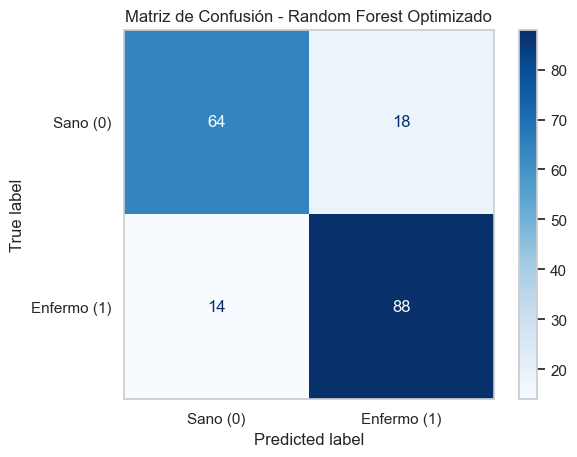

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay

# Mostramos visualmente la matriz de confusi√≥n
ConfusionMatrixDisplay.from_estimator(
    best_rf_model, X_test, y_test,
    display_labels=['Sano (0)', 'Enfermo (1)'],
    cmap="Blues"
)
plt.title("Matriz de Confusi√≥n - Random Forest Optimizado")
plt.grid(False)
plt.show()

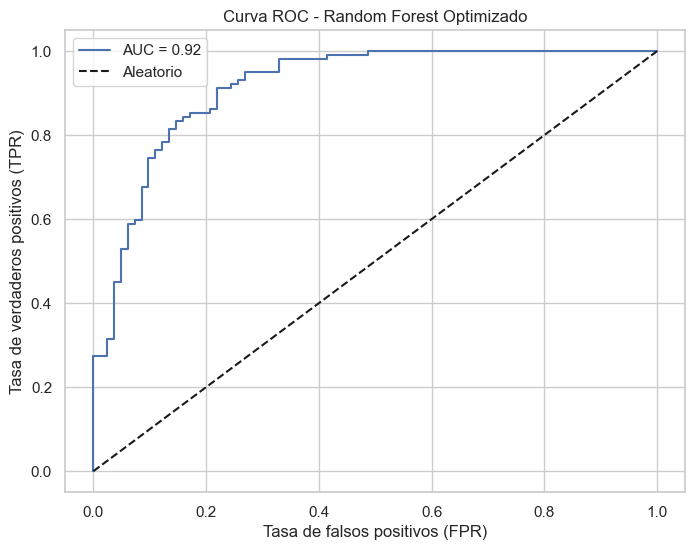

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtenemos las probabilidades para la clase positiva
y_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.title("Curva ROC - Random Forest Optimizado")
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.legend()
plt.grid(True)
plt.show()



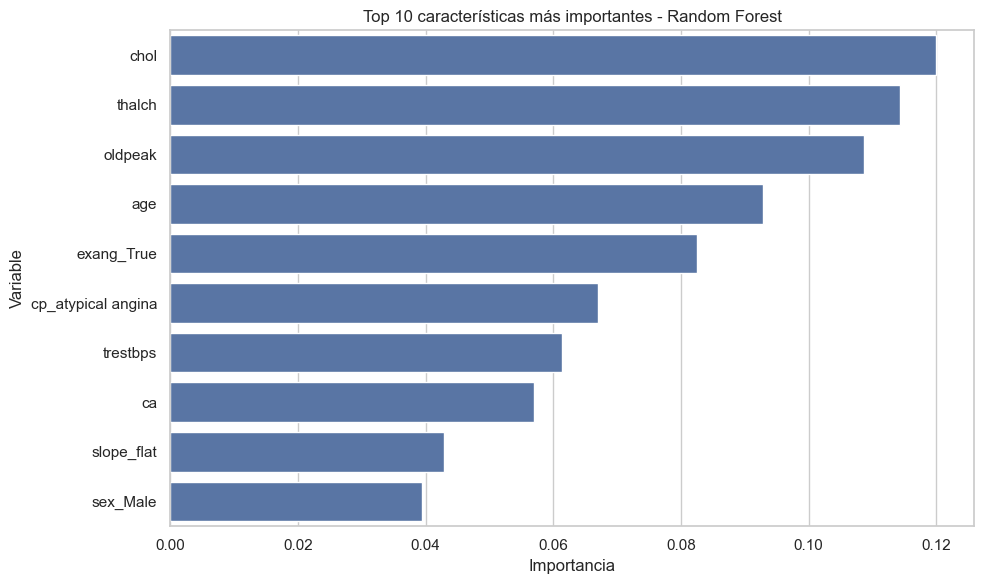

In [12]:
# Obtenemos la importancia de cada variable
importances = best_rf_model.feature_importances_
features = X.columns

# Creamos un DataFrame para ordenar visualmente
importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Graficamos las m√°s importantes
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df.head(10))
plt.title('Top 10 caracter√≠sticas m√°s importantes - Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()



C:\Users\User\AppData\Local\Temp\ipykernel_29028\4252236300.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=y_test, y=y_prob_rf, jitter=0.2, palette='Set1')


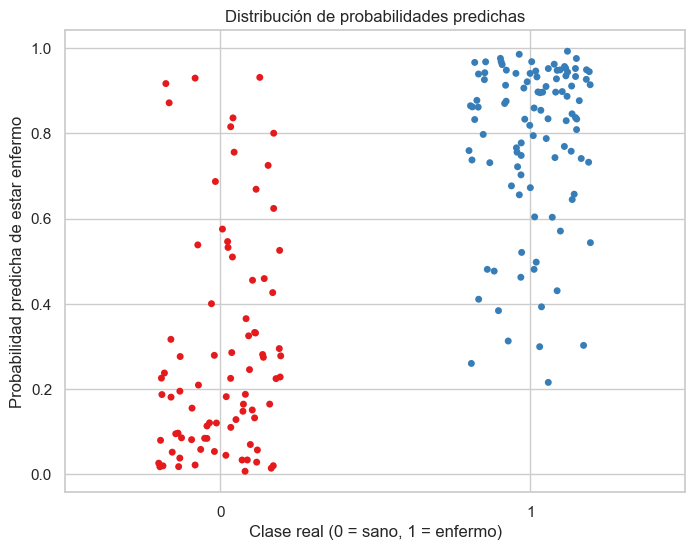

In [13]:
# Visualizamos las probabilidades predichas por el modelo frente a la clase real
plt.figure(figsize=(8, 6))
sns.stripplot(x=y_test, y=y_prob_rf, jitter=0.2, palette='Set1')
plt.title('Distribuci√≥n de probabilidades predichas')
plt.xlabel('Clase real (0 = sano, 1 = enfermo)')
plt.ylabel('Probabilidad predicha de estar enfermo')
plt.grid(True)
plt.show()


In [19]:
import numpy as np

# Elegimos un √≠ndice aleatorio del conjunto de prueba
random_idx = np.random.randint(0, X_test.shape[0])

# Extraemos ese registro y su valor real
registro = X_test[random_idx].reshape(1, -1)
real = y_test.iloc[random_idx]

# Hacemos la predicci√≥n con el mejor modelo
prediccion = best_rf_model.predict(registro)[0]
proba = best_rf_model.predict_proba(registro)[0][1]  # probabilidad clase 1

# Mostramos el resultado
print(f" Predicci√≥n aleatoria del modelo sobre un paciente:")
print(f" √çndice del paciente: {random_idx}")
print(f" Valor real: {'Enfermo' if real == 1 else 'Sano'}")
print(f" Predicci√≥n del modelo: {'Enfermo' if prediccion == 1 else 'Sano'}")
print(f" Probabilidad de enfermedad: {proba:.2%}")


 Predicci√≥n aleatoria del modelo sobre un paciente:
 √çndice del paciente: 165
 Valor real: Sano
 Predicci√≥n del modelo: Enfermo
 Probabilidad de enfermedad: 68.73%
